# Regresja liniowa
Autor: Jarosław Żygierewicz
Korekta: Rafał Masełek

Importujemy ponownie powtórzone `numpy`, dodajemy moduł do tworzenia wykresów `pyplot`.

In [1]:
import numpy as np
import pylab as py

# Zapoznanie się z regresją liniową
* W ramach tego ćwiczenia będziemy chcieli opisać zbiór danych modelem liniowym.
* Zbiór danych stworzymy sami w sposób sztuczny, ale w typowych problemach zebranie i obróbka danych stanowi znaczącą część pracy.
* Nasz liniowy model ma postać: $y = \theta_0 + \theta_1 x$
* Dane wytworzymy dla konkretnych $\theta_0$ i $\theta_1$, a następnie zaimplementujemy regresję liniową, aby znaleźć jak najlepsze przybliżenie dla tych parametrów.
* `(X,Y)` to ciąg uczący. *Co to ciąg uczący?*

## Produkcja danych

Zacznijmy od produkcji $x$. W późniejszej części ćwiczenia zobaczymy, że wygodniej je mieć w postaci wektora kolumnowego, ale na razie zróbmy płaską tablicę 1D. Proszę wygenerować n równoodległych punktów w przedziale [0,10], gdzie n jest wybraną przez was liczbą naturalną nie mniejszą niż 10.

In [79]:
n = ...
x = ...
print(x)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


Ustalamy parametry dla symulacji $\theta_0 = 1$ i $\theta_1 = 3$:

In [80]:
theta0 = ..
theta1 = ..

Teraz produkujemy odpowiadające $y = \theta_0 + \theta_1 x$ korzystając z wybranych parametrów.

In [81]:
y = ...
print(y)

[ 1.          4.33333333  7.66666667 11.         14.33333333 17.66666667
 21.         24.33333333 27.66666667 31.        ]


Proszę wyplotować dane jako punkty na wykresie.

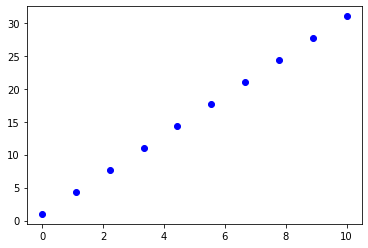

In [82]:
py.plot(...)
py.show()

Skomplikujmy trochę zadanie dla naszej regresji. Wprowadźmy coś na kształt szumu: do każdego $y$ dodaj małą liczbę losową z N(0,1) i ponownie narysuj wykres. Teraz dane wyglądają bardziej życiowo! 

[-0.21770599  7.14106192  6.32885821 10.34162419 12.96074282 17.64124477
 21.32769986 26.19914603 28.32919825 30.71779142]


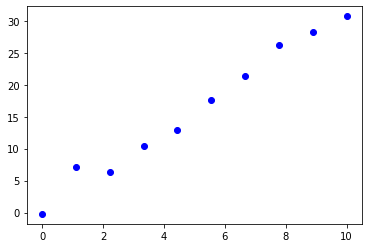

In [83]:
y = ...
print(y)
py.plot(...)
py.show()

## Algorytm równań normalnych
Proszę napisać funkcję, która:
* na wejściu przyjmuje ciąg uczący, implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* Funkcja powinna zwracać estymowane parametry theta.
* Proszę dorysować prostą reprezentującą hipotezę do wykresu punktów ciągu uczącego.
* dla przypomnienia: odwrotność macierzy można obliczyć w numpy funkcją: <tt>numpy.linalg.inv</tt>
* proszę zwrócić uwagę, że konieczne jest użycie wektorów kolumnowych!

Podpowiedź: aby skorzystać ze wzorów z wykładu, macierz wejść $X$ musi zawierać nie tylko kolumnę $x$, ale także kolumnę jedynek, aby przemnożona przez wektor [$\theta_0$ $\theta_1$] dawała odpowiedni wektor (kolumnowy) wyjść $y$.

(10, 2) (10, 1)
[[0.70260436]
 [3.07487236]]
prawdziwe wartości parametrów:  [1 3]
wartości estymowane za pomocą równań normalnych:  [[0.70260436 3.07487236]]


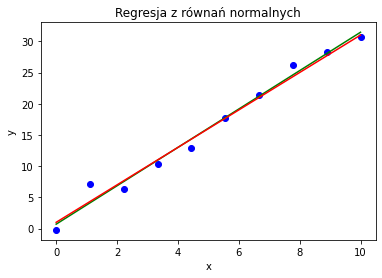

In [84]:
def licz_rownania_normalne(X,y):
    # twoj kod tutaj
    return theta

# dodaj kolumne jedynek za pomocą np.column_stack
X = ...
# nadaj odpowiedni wymiar, zeby mnozyc macierzowo
Y = ...

print(X.shape, Y.shape)
# tworzymy array z parametrami
theta = np.array([theta0, theta1])
# wywolujemy algorytm znajdujacy optymalne wartosci parametrow
theta_est = licz_rownania_normalne(X, Y)


print("prawdziwe wartości parametrów: ", theta.T)
print("wartości estymowane za pomocą równań normalnych: ", theta_est.T)
py.plot(X[:,1], Y,'bo')
# policz y za pomoca estymowanych parametrow
y_reg = ... 
py.plot(X[:,1],y_reg,'g')
# policz y za pomoca oryginalnych/prawdziwych parametrow
y_oryg = ...
py.plot(X[:,1], y_oryg,'r')
py.xlabel("x")
py.ylabel("y")
py.title("Regresja z równań normalnych")
py.show()

## Algorytm gradientowy stochastyczny 
Proszę napisać funkcję, która znajduje optymalne parametry theta wg algorytmu gradientowego stochastycznego. 
Funkcja jako argumenty przyjmuje:
1. ciąg uczący, 
2. (dowolne) wartości początkowe theta 
3. parametr szybkości zbiegania alpha
4. liczbę epok (iteracji)

W każdej iteracji funkcja wybiera losowo jeden z punktów z ciągu uczącego i modyfikuje w oparciu o niego parametry theta. Na wyjściu funkcja powinna zwracać wyestymowane wartości parametrów theta.

W ramach ilustracji po każdej iteracji proszę dorysować zieloną prostą parametryzowaną przez aktualne wartości parametrów. 

prawdziwe wartości parametrów:  [1 3]
wartości estymowane za pomocą algorytmu gradientowego stochastycznego:  [[0.51183332 3.12234433]]


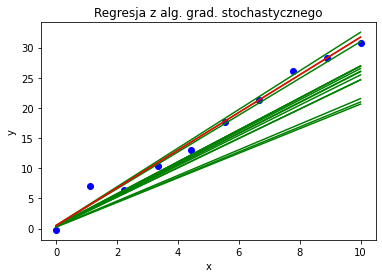

In [93]:
def licz_iteracyjnie_stoch(X, Y, theta = np.array([0,0]).reshape(2,1), alpha = 0.01, epochs = 15):
    for i in range(epochs):
        # wybieramy losowy indeks
        ind = ...
        # mały x to pojedynczy przykład o indeksie ind
        x =  ...
        # nadajemy x odpowiedni kształt by mnożyć macierzowo
        x = ...
        # zmieniamy wartości parametrów theta
        theta = ...
        # rysujemy prostą dla wyestymowanych wartości parametrów
        y_est = ...
        py.plot(... , 'g')
    
    return theta

#################################################
print("prawdziwe wartości parametrów: ", theta.T)

# narusuj dane wejściowe 
py.plot(X[:,1], Y, 'bo', label='true')
# znajdź optymalne wartości parametrów
theta_est = licz_iteracyjnie_stoch(X,Y)

# narysuj prostą w oparciu o znalezione parametry
y_est = ...
py.plot(..., y_est, 'r')


print("wartości estymowane za pomocą algorytmu gradientowego stochastycznego: ", theta_est.T)
py.xlabel("x")
py.ylabel("y")
py.title(u"Regresja z alg. grad. stochastycznego")
py.show()

## Algortym gradientowy zbiorczy
Proszę napisać funkcję, która znajduje optymalne parametry theta wg algorytmu gradientowego zbiorczego. 
Funkcja jako argumenty przyjmuje:
1. ciąg uczący, 
2. (dowolne) wartości początkowe theta 
3. parametr szybkości zbiegania alpha
4. liczbę epok (iteracji)

W każdej iteracji funkcja modyfikuje parametry theta w oparciu o **wszystkie** punkty z ciągu uczącego. Na wyjściu funkcja powinna zwracać wyestymowane wartości parametrów theta.

W ramach ilustracji po każdej iteracji proszę dorysować zieloną prostą parametryzowaną przez aktualne wartości parametrów. 

prawdziwe wartości parametrów:  [[0.16076966 1.11702975]]
wartości estymowane za pomocą algorytmu gradientowego zbiorczego:  [[0.16076966 1.11702975]]
prawdziwe wartości parametrów:  [[0.26408014 1.83299203]]
wartości estymowane za pomocą algorytmu gradientowego zbiorczego:  [[0.26408014 1.83299203]]
prawdziwe wartości parametrów:  [[0.3305594  2.29187614]]
wartości estymowane za pomocą algorytmu gradientowego zbiorczego:  [[0.3305594  2.29187614]]
prawdziwe wartości parametrów:  [[0.37342966 2.58597706]]
wartości estymowane za pomocą algorytmu gradientowego zbiorczego:  [[0.37342966 2.58597706]]
prawdziwe wartości parametrów:  [[0.40116617 2.77445451]]
wartości estymowane za pomocą algorytmu gradientowego zbiorczego:  [[0.40116617 2.77445451]]
prawdziwe wartości parametrów:  [1 3]
wartości estymowane za pomocą algorytmu gradientowego zbiorczego:  [[0.40116617 2.77445451]]


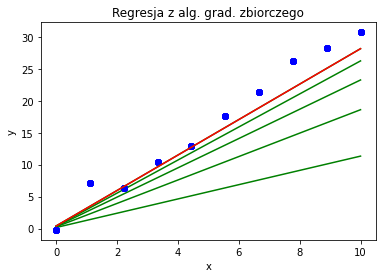

In [99]:
def licz_iteracyjnie_batch(X,Y, theta = np.array([0,0]).reshape(2,1), alpha = 0.001, epochs = 5):
    for i in range(epochs):
        # bedziemy tutaj zapisywac zmiany wartosci parametrow
        # na poczatek inicjalizujemy zerami
        delta = np.zeros((len(theta),1))
        
        for ind, x in enumerate(X):          
            # mały x to pojedynczy przykład
            # nadaj mu odpowiedni wymiar do mnozenia macierzowego
            x = ...
            # policz zmiane parametrow
            delta += ...
        
        # zmieniamy parametry w następujący sposób
        theta = theta - alpha * delta
        print("prawdziwe wartości parametrów: ", theta.T)
        print("wartości estymowane za pomocą algorytmu gradientowego zbiorczego: ", theta.T)
        py.plot(X[:,1], Y, 'bo')
        y_reg = np.dot(X,theta) 
        py.plot(X[:,1], y_reg, 'g')
        
    return theta

# rysujemy punkty
py.plot(X[:,1], Y, 'bo')
# liczymy parametry
theta_est = licz_iteracyjnie_batch(X,Y)
print("prawdziwe wartości parametrów: ", theta.T)
print("wartości estymowane za pomocą algorytmu gradientowego zbiorczego: ", theta_est.T)

# rysujemy prosta ze znalezionymi parametrami
y_reg = ... 
py.plot( ... , 'r')
py.xlabel("x")
py.ylabel("y")
py.title(u"Regresja z alg. grad. zbiorczego")
py.show() 

## Porównanie algorytmów
* Proszę sprawdzić zbieżność algorytmów w zależności od parametrów szybkości zbiegania.
* Proszę sprawdzić czy algorytmy optymalizacyjne działają poprawnie dla danych gdzie błąd podlega innym rozkładom prawdopodobieństwa niż normalny. np. rozkład jednorodny lub  t o 3 st. swobody.